In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

In [ ]:
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unitid                        1130 non-null   int64  
 1   INSTNM                        1130 non-null   object 
 2   FIPS                          1130 non-null   int64  
 3   county_name                   1130 non-null   object 
 4   city                          1130 non-null   object 
 5   state                         1130 non-null   object 
 6   zip                           1130 non-null   object 
 7   latitude                      1130 non-null   float64
 8   longitude                     1130 non-null   float64
 9   date                          1130 non-null   object 
 10  week                          1130 non-null   int64  
 11  admission_rate                1130 non-null   float64
 12  number_students               1130 non-null   int64  
 13  Tot

In [ ]:
df['INSTNM'].nunique()

117

In [ ]:
df.rename(columns={'INSTNM':'University'},inplace=True)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
#create a weekly dataframe by state
df_weekly = df.groupby(['University', 'date']).mean()
df_weekly = df_weekly[['TotalPositivityRateWeekly']].reset_index()

df_weekly.head()

<ipython-input-10-3652bd4426fe>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df.groupby(['University', 'date']).mean()


University       date  TotalPositivityRateWeekly
0  Appalachian State University 2020-09-20                   3.595784
1  Appalachian State University 2020-09-27                   3.456790
2  Appalachian State University 2020-10-04                   8.956276
3  Appalachian State University 2020-10-11                   8.428128
4  Appalachian State University 2020-10-18                   4.188482

In [ ]:
list_uni = list(set(df['University']))

In [ ]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   University                 1130 non-null   object        
 1   date                       1130 non-null   datetime64[ns]
 2   TotalPositivityRateWeekly  1130 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 26.6+ KB


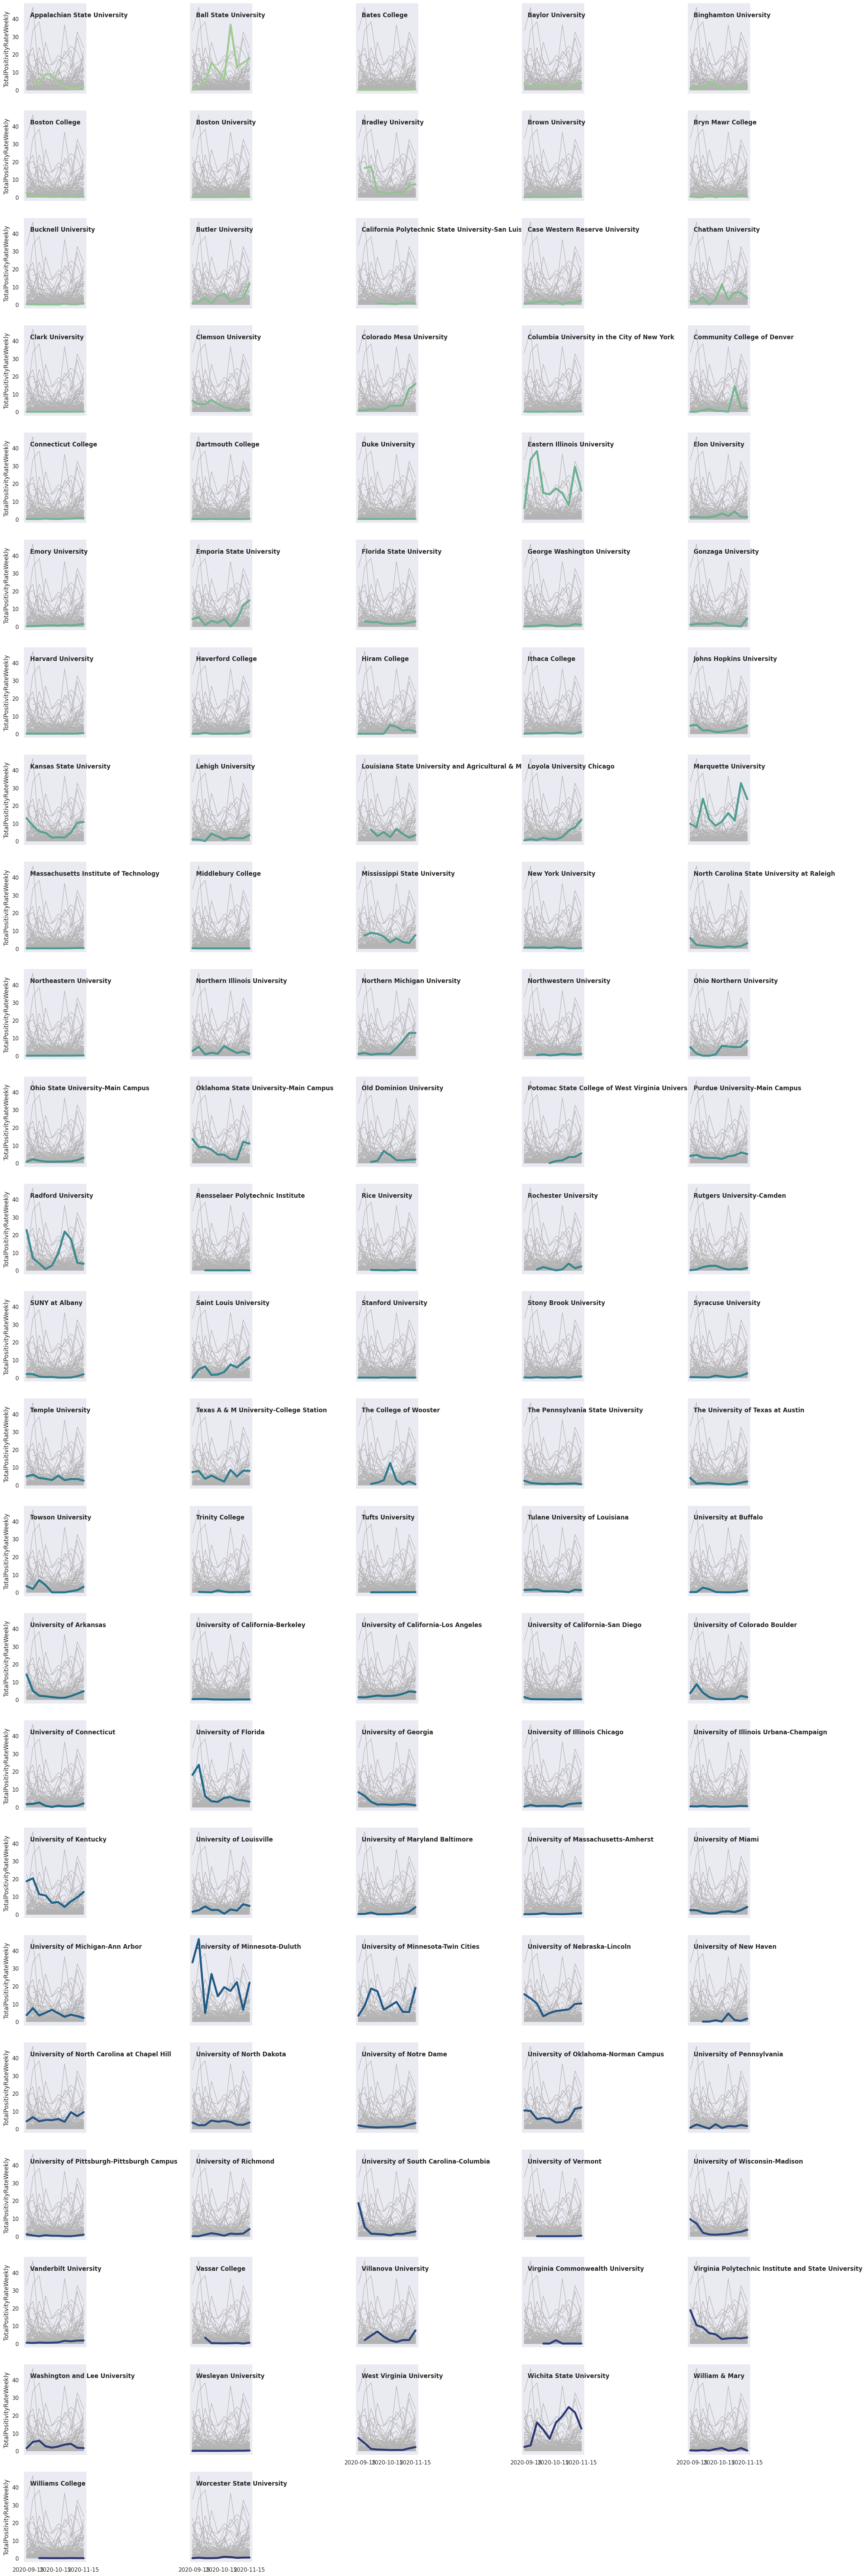

In [ ]:
sns.set_theme(style="dark")
g = sns.relplot(data = df_weekly, x = "date", y = "TotalPositivityRateWeekly",
                col = 'University', hue = 'University',
                kind = "line", palette = "crest",
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for state, ax in g.axes_dict.items():
    ax.text(.1, .85, state,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = df_weekly, x = "date", y = "TotalPositivityRateWeekly", units='University',
                 estimator = None, color= ".7", linewidth=1, ax=ax,
                )

ax.set_xticks(ax.get_xticks()[::4])
g.set_titles("")
g.set_axis_labels("", "TotalPositivityRateWeekly")
g.tight_layout()

In [ ]:
#create a weekly dataframe by state
df_weekly2 = df.groupby(['date']).mean()
df_weekly2 = df_weekly2[['TotalPositivityRateWeekly']].reset_index()

df_weekly2.head()

<ipython-input-16-3421c9fd6971>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



date  TotalPositivityRateWeekly
0 2020-09-13                   3.627602
1 2020-09-20                   3.723800
2 2020-09-27                   2.828155
3 2020-10-04                   2.418877
4 2020-10-11                   1.963738

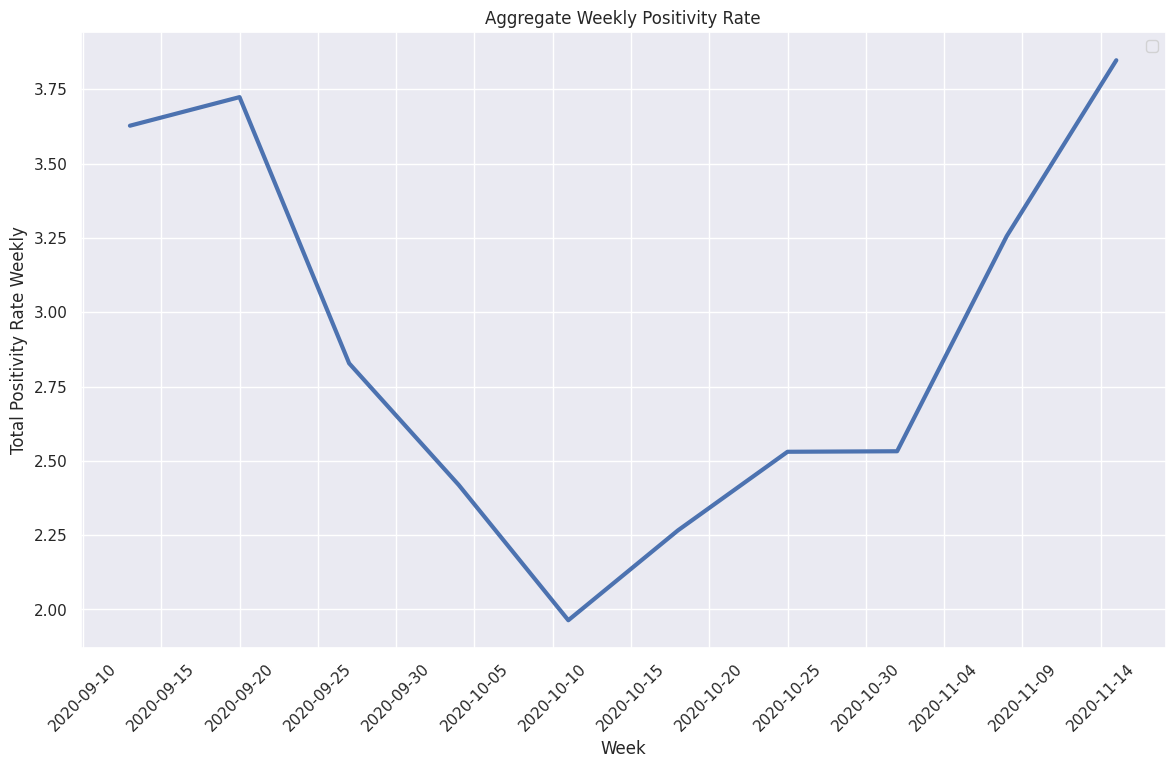

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_weekly2, x ='date', y = 'TotalPositivityRateWeekly',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Total Positivity Rate Weekly')
plt.xlabel('Week')
plt.title('Aggregate Weekly Positivity Rate')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
#create a weekly dataframe by uni
df_weekly3 = df.groupby(['University','date']).mean()
df_weekly3 = df_weekly3[['TotalPositivityRate']].reset_index()

df_weekly3.head()

<ipython-input-18-d92c35949b66>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



University       date  TotalPositivityRate
0  Appalachian State University 2020-09-20             3.332598
1  Appalachian State University 2020-09-27             3.365306
2  Appalachian State University 2020-10-04             4.412736
3  Appalachian State University 2020-10-11             5.229927
4  Appalachian State University 2020-10-18             5.001232

In [ ]:
df_weekly3 = (
    df_weekly3
    .drop_duplicates(['University'], keep='last')
    .reset_index(drop=True)
)

In [ ]:
df_weekly3.sort_values('TotalPositivityRate',ascending=False)

University       date  \
1                          Ball State University 2020-11-15   
91                University of Minnesota-Duluth 2020-11-15   
39                          Marquette University 2020-11-15   
23                   Eastern Illinois University 2020-11-15   
95   University of North Carolina at Chapel Hill 2020-11-15   
..                                           ...        ...   
2                                  Bates College 2020-11-15   
15                              Clark University 2020-11-15   
56              Rensselaer Polytechnic Institute 2020-11-15   
115                             Williams College 2020-11-15   
41                            Middlebury College 2020-11-15   

     TotalPositivityRate  
1              33.483755  
91             19.174041  
39             14.516129  
23             12.398997  
95             11.948691  
..                   ...  
2               0.042199  
15              0.035451  
56              0.022143  
115             0.017323  
41              0.016727  

[117 rows x 3 columns]

In [ ]:
top_10 = df_weekly3.nlargest(10, 'TotalPositivityRate')
top_10

University       date  \
1                         Ball State University 2020-11-15   
91               University of Minnesota-Duluth 2020-11-15   
39                         Marquette University 2020-11-15   
23                  Eastern Illinois University 2020-11-15   
95  University of North Carolina at Chapel Hill 2020-11-15   
7                            Bradley University 2020-11-15   
98         University of Oklahoma-Norman Campus 2020-11-15   
55                           Radford University 2020-11-15   
93               University of Nebraska-Lincoln 2020-11-15   
92          University of Minnesota-Twin Cities 2020-11-15   

    TotalPositivityRate  
1             33.483755  
91            19.174041  
39            14.516129  
23            12.398997  
95            11.948691  
7             11.734846  
98            10.884030  
55            10.342857  
93             9.656076  
92             9.251352

In [ ]:
top_10_list = list(set(top_10['University']))
top_10_list

['University of North Carolina at Chapel Hill',
 'University of Nebraska-Lincoln',
 'Ball State University',
 'Eastern Illinois University',
 'Marquette University',
 'University of Oklahoma-Norman Campus',
 'Radford University',
 'Bradley University',
 'University of Minnesota-Twin Cities',
 'University of Minnesota-Duluth']

In [ ]:
#get data of top 10 universities with highest positive rate
df1 = df[df['University'].isin(top_10_list)]

In [ ]:
#check again to make sure capture the right unis
df1['University'].unique()

array(['Bradley University', 'Eastern Illinois University',
       'Ball State University', 'University of Minnesota-Twin Cities',
       'University of Minnesota-Duluth', 'University of Nebraska-Lincoln',
       'University of North Carolina at Chapel Hill',
       'University of Oklahoma-Norman Campus', 'Radford University',
       'Marquette University'], dtype=object)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 183 to 1099
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   unitid                        99 non-null     int64         
 1   University                    99 non-null     object        
 2   FIPS                          99 non-null     int64         
 3   county_name                   99 non-null     object        
 4   city                          99 non-null     object        
 5   state                         99 non-null     object        
 6   zip                           99 non-null     object        
 7   latitude                      99 non-null     float64       
 8   longitude                     99 non-null     float64       
 9   date                          99 non-null     datetime64[ns]
 10  week                          99 non-null     int64         
 11  admission_rate                

In [ ]:
top_10_list

['University of North Carolina at Chapel Hill',
 'University of Nebraska-Lincoln',
 'Ball State University',
 'Eastern Illinois University',
 'Marquette University',
 'University of Oklahoma-Norman Campus',
 'Radford University',
 'Bradley University',
 'University of Minnesota-Twin Cities',
 'University of Minnesota-Duluth']

In [ ]:
#univeristy with higest cumulative positive rate
bradley_uni = df1.loc[df1['University'] == 'Bradley University']
radford_uni = df1.loc[df1['University'] == 'Radford University']
mn_duluth_uni = df1.loc[df1['University'] == 'University of Minnesota-Duluth']
mn_twin_uni = df1.loc[df1['University'] == 'University of Minnesota-Twin Cities']
ball_state_uni = df1.loc[df1['University'] == 'Ball State University']
ok_uni = df1.loc[df1['University'] == 'University of Oklahoma-Norman Campus']
nc_uni = df1.loc[df1['University'] == 'University of North Carolina at Chapel Hill']
il_uni = df1.loc[df1['University'] == 'Eastern Illinois University']
marquette_uni = df1.loc[df1['University'] == 'Marquette University']
nl_uni = df1.loc[df1['University'] == 'University of Nebraska-Lincoln']

In [ ]:
bradley_uni = bradley_uni.reset_index(drop=True)
radford_uni = radford_uni.reset_index(drop=True)
mn_duluth_uni = mn_duluth_uni.reset_index(drop=True)
mn_twin_uni = mn_twin_uni.reset_index(drop=True)
ball_state_uni = ball_state_uni.reset_index(drop=True)
ok_uni = ok_uni.reset_index(drop=True)
nc_uni = nc_uni.reset_index(drop=True)
il_uni = il_uni.reset_index(drop=True)
marquette_uni = marquette_uni.reset_index(drop=True)
nl_uni = nl_uni.reset_index(drop=True)

In [ ]:
#Ball State University
ball_state_uni = ball_state_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()
ball_state_uni

date  TotalPositivityRateWeekly
0 2020-09-13                   0.000000
1 2020-09-20                   1.818182
2 2020-09-27                   3.703704
3 2020-10-04                  15.384615
4 2020-10-11                  10.869565
5 2020-10-18                   5.555556
6 2020-10-25                  36.585366
7 2020-11-01                  12.903226
8 2020-11-08                  15.151515
9 2020-11-15                  17.647059

In [ ]:
ball_state_uni = ball_state_uni.set_index('date')
ball_state_uni.index

DatetimeIndex(['2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04',
               '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01',
               '2020-11-08', '2020-11-15'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
rolling_mean = ball_state_uni.rolling(2).mean()
rolling_std = ball_state_uni.rolling(2).std()

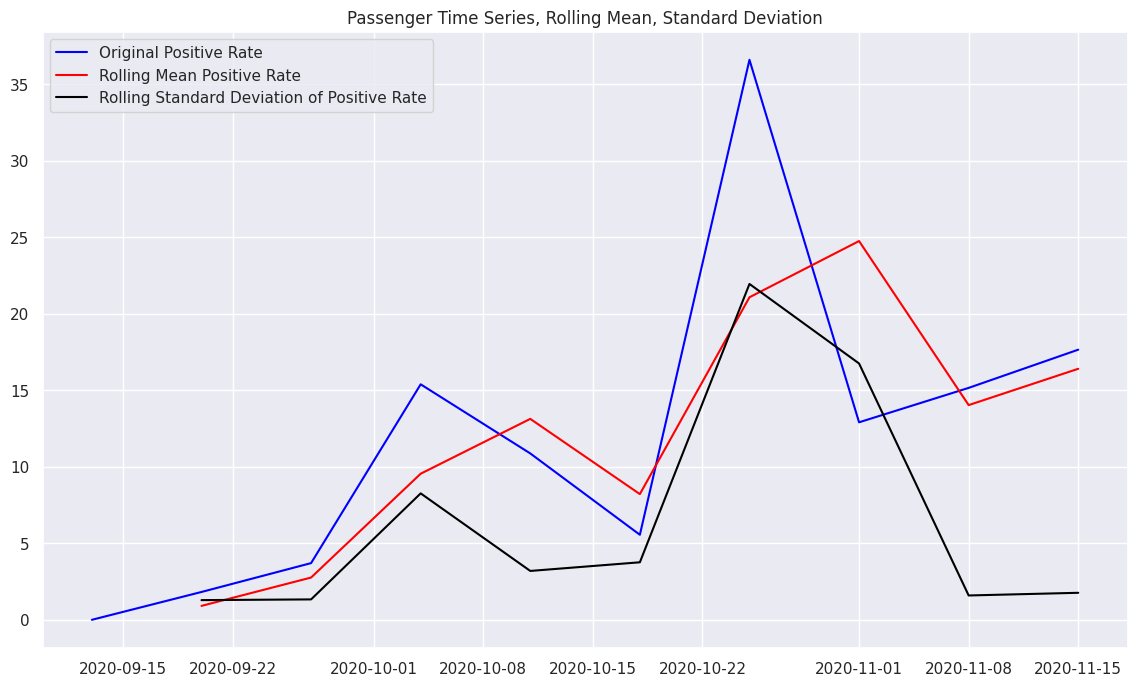

In [ ]:
plt.plot(ball_state_uni, color="blue",label="Original Positive Rate")
plt.plot(rolling_mean, color="red", label="Rolling Mean Positive Rate")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation of Positive Rate")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adft = adfuller(ball_state_uni,autolag="AIC")

In [ ]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

     Values                       Metric
0 -1.554266              Test Statistics
1  0.506517                      p-value
2  3.000000             No. of lags used
3  6.000000  Number of observations used
4 -5.354256          critical value (1%)
5 -3.646238          critical value (5%)
6 -2.901198         critical value (10%)


In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
train = ball_state_uni.iloc[:-int(len(ball_state_uni) * 0.3)]
test = ball_state_uni.iloc[-int(len(ball_state_uni) * 0.3):]

In [ ]:
train = train.reset_index()
test = test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
test['mean_forecast'] = train['TotalPositivityRateWeekly'].mean()
plot_func(test['mean_forecast'], 'Average Forecast')

In [ ]:
rms1 = sqrt(mean_squared_error(test['TotalPositivityRateWeekly'], test['mean_forecast']))
print(rms1)

5.060012862998856


In [ ]:
# Naive forecast
test['naive_forecast'] = train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(test['naive_forecast'], 'Naive Forecast')

In [ ]:
rms2 = sqrt(mean_squared_error(test['TotalPositivityRateWeekly'], test['naive_forecast']))
print(rms2)

21.439163434431027


In [ ]:
# Moving average forcast
test['moving_avg_forecast'] = train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(test['moving_avg_forecast'], 'Moving Average Forecast for Ball State University')

In [ ]:
rms3 = sqrt(mean_squared_error(test['TotalPositivityRateWeekly'], test['moving_avg_forecast']))
print(rms3)

2.101649643716591


In [ ]:
#Marquette University
marquette_uni = marquette_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()
marquette_uni

date  TotalPositivityRateWeekly
0 2020-09-13                   9.701493
1 2020-09-20                   7.803993
2 2020-09-27                  23.834197
3 2020-10-04                  12.266112
4 2020-10-11                   8.653846
5 2020-10-18                  10.966057
6 2020-10-25                  15.806452
7 2020-11-01                  11.607143
8 2020-11-08                  32.625995
9 2020-11-15                  23.519459

In [ ]:
marquette_uni = marquette_uni.set_index('date')
marquette_uni.index

DatetimeIndex(['2020-09-13', '2020-09-20', '2020-09-27', '2020-10-04',
               '2020-10-11', '2020-10-18', '2020-10-25', '2020-11-01',
               '2020-11-08', '2020-11-15'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
marquette_train = marquette_uni.iloc[:-int(len(marquette_uni) * 0.3)]
marquette_test = marquette_uni.iloc[-int(len(marquette_uni) * 0.3):]

In [ ]:
marquette_train = marquette_train.reset_index()
marquette_test = marquette_test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=marquette_train['date'], y=marquette_train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=marquette_test['date'], y=marquette_test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=marquette_test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
marquette_test['mean_forecast'] = marquette_train['TotalPositivityRateWeekly'].mean()
plot_func(marquette_test['mean_forecast'], 'Average Forecast')

In [ ]:
rms_marquette_mean = sqrt(mean_squared_error(marquette_test['TotalPositivityRateWeekly'], marquette_test['mean_forecast']))
print(rms_marquette_mean)

13.091750066794514


In [ ]:
# Naive forecast
marquette_test['naive_forecast'] = marquette_train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(marquette_test['naive_forecast'], 'Naive Forecast')

In [ ]:
rms_marquette_naive = sqrt(mean_squared_error(marquette_test['TotalPositivityRateWeekly'], marquette_test['naive_forecast']))
print(rms_marquette_naive)

10.954781291708052


In [ ]:
# Moving average forcast
marquette_test['moving_avg_forecast'] = marquette_train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(marquette_test['moving_avg_forecast'], 'Moving Average Forecast for Marquette University')

In [ ]:
rms_marquette_ma = sqrt(mean_squared_error(marquette_test['TotalPositivityRateWeekly'], marquette_test['moving_avg_forecast']))
print(rms_marquette_ma)

11.94190089348848


In [ ]:
#Eastern Illinois University
il_uni = il_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()
il_uni

date  TotalPositivityRateWeekly
0 2020-09-13                   6.060606
1 2020-09-20                  33.600000
2 2020-09-27                  38.317757
3 2020-10-04                  14.759036
4 2020-10-11                  13.924051
5 2020-10-18                  17.333333
6 2020-10-25                  14.492754
7 2020-11-01                   8.021390
8 2020-11-08                  29.411765
9 2020-11-15                  16.097561

In [ ]:
il_uni = il_uni.set_index('date')
il_uni.index
il_train = il_uni.iloc[:-int(len(il_uni) * 0.3)]
il_test = il_uni.iloc[-int(len(il_uni) * 0.3):]

In [ ]:
il_train = il_train.reset_index()
il_test = il_test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=il_train['date'], y=il_train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=il_test['date'], y=il_test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=il_test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
il_test['mean_forecast'] = il_train['TotalPositivityRateWeekly'].mean()
plot_func(il_test['mean_forecast'], 'Average Forecast')

In [ ]:
# Naive forecast
il_test['naive_forecast'] = il_train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(il_test['naive_forecast'], 'Naive Forecast')

In [ ]:
# Moving average forcast
il_test['moving_avg_forecast'] = il_train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(il_test['moving_avg_forecast'], 'Moving Average Forecast for Eastern Illinois University')

In [ ]:
#'University of Minnesota-Duluth'
mn_duluth_uni = mn_duluth_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()

In [ ]:
mn_duluth_uni = mn_duluth_uni.set_index('date')
mn_duluth_uni.index
mn_duluth_train = mn_duluth_uni.iloc[:-int(len(mn_duluth_uni) * 0.3)]
mn_duluth_test = mn_duluth_uni.iloc[-int(len(mn_duluth_uni) * 0.3):]

In [ ]:
mn_duluth_train = mn_duluth_train.reset_index()
mn_duluth_test = mn_duluth_test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=mn_duluth_train['date'], y=mn_duluth_train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=mn_duluth_test['date'], y=mn_duluth_test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=mn_duluth_test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
mn_duluth_test['mean_forecast'] = mn_duluth_train['TotalPositivityRateWeekly'].mean()
plot_func(mn_duluth_test['mean_forecast'], 'Average Forecast')

In [ ]:
# Naive forecast
mn_duluth_test['naive_forecast'] = mn_duluth_train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(mn_duluth_test['naive_forecast'], 'Naive Forecast')

In [ ]:
# Moving average forcast
mn_duluth_test['moving_avg_forecast'] = mn_duluth_train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(mn_duluth_test['moving_avg_forecast'], 'MA Forecast for University of Minnesota-Duluth')

In [ ]:
#University of North Carolina at Chapel Hill
nc_uni = nc_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()

In [ ]:
nc_uni = nc_uni.set_index('date')
nc_uni.index
nc_train = nc_uni.iloc[:-int(len(nc_uni) * 0.3)]
nc_test = nc_uni.iloc[-int(len(nc_uni) * 0.3):]
nc_train = nc_train.reset_index()
nc_test = nc_test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=nc_train['date'], y=nc_train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=nc_test['date'], y=nc_test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=nc_test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
nc_test['mean_forecast'] = nc_train['TotalPositivityRateWeekly'].mean()
plot_func(nc_test['mean_forecast'], 'Average Forecast')

In [ ]:
# Naive forecast
nc_test['naive_forecast'] = nc_train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(nc_test['naive_forecast'], 'Naive Forecast')

In [ ]:
# Moving average forcast
nc_test['moving_avg_forecast'] = nc_train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(nc_test['moving_avg_forecast'], 'MA Forecast for University of North Carolina')

In [ ]:
#create a weekly dataframe by uni & number of students
df_weekly4 = df.groupby(['University']).mean()
df_weekly4 = df_weekly4[['number_students']].reset_index()

df_weekly4.head()

<ipython-input-83-427a1c45975a>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



University  number_students
0  Appalachian State University          17265.0
1         Ball State University          15529.0
2                 Bates College           1832.0
3             Baylor University          14159.0
4         Binghamton University          13990.0

In [ ]:
df_weekly4 = (
    df_weekly4
    .drop_duplicates(['University'], keep='last')
    .reset_index(drop=True)
)

In [ ]:
top_5_by_enrollment = df_weekly4.nlargest(5, 'number_students')
top_5_by_enrollment

University  number_students
66  Texas A & M University-College Station          53194.0
50       Ohio State University-Main Campus          45769.0
69       The University of Texas at Austin          40329.0
68       The Pennsylvania State University          40108.0
81                   University of Florida          34564.0

In [ ]:
top_5_by_en_list = list(set(top_5_by_enrollment['University']))

In [ ]:
#get data of top 10 universities with highest positive rate
df_5_enrollment = df[df['University'].isin(top_5_by_en_list)]

In [ ]:
#create a weekly dataframe by state
df_5_enrollment_grouped = df_5_enrollment.groupby(['University', 'date']).mean()
df_5_enrollment_grouped = df_5_enrollment_grouped[['TotalPositivityRateWeekly']].reset_index()

df_5_enrollment_grouped.head()

<ipython-input-88-3d40055faab4>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



University       date  TotalPositivityRateWeekly
0  Ohio State University-Main Campus 2020-09-13                   0.743633
1  Ohio State University-Main Campus 2020-09-20                   2.157337
2  Ohio State University-Main Campus 2020-09-27                   1.278323
3  Ohio State University-Main Campus 2020-10-04                   0.817488
4  Ohio State University-Main Campus 2020-10-11                   0.759913

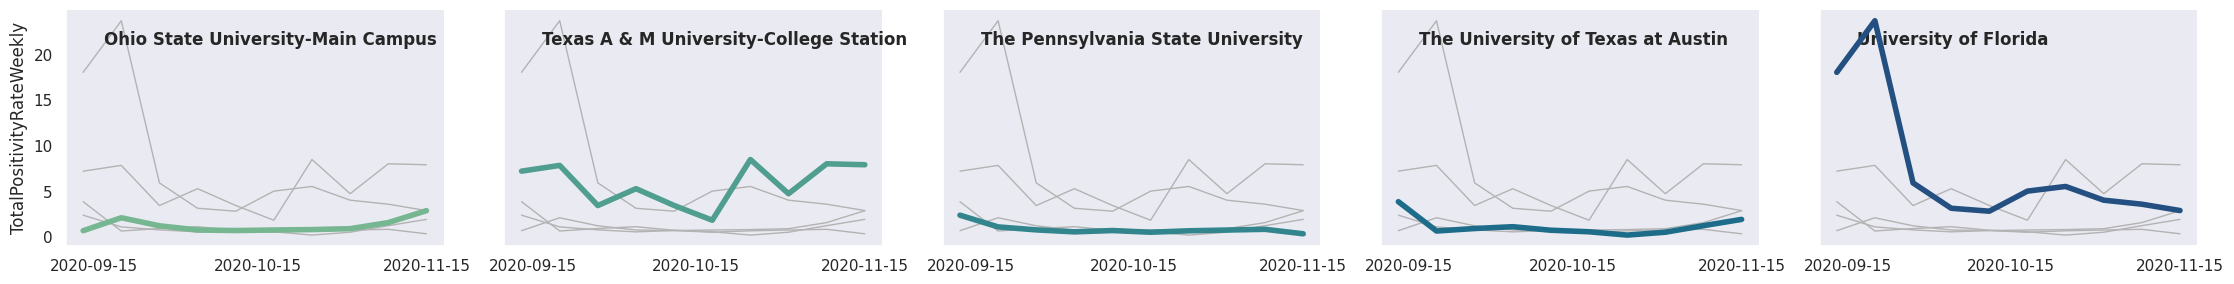

In [ ]:
#time series charts show positive rate weekly by top 10 school by enrollment
sns.set_theme(style="dark")
g = sns.relplot(data = df_5_enrollment_grouped, x = "date", y = "TotalPositivityRateWeekly",
                col = 'University', hue = 'University',
                kind = "line", palette = "crest",
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for state, ax in g.axes_dict.items():
    ax.text(.1, .85, state,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = df_5_enrollment_grouped, x = "date", y = "TotalPositivityRateWeekly", units='University',
                 estimator = None, color= ".7", linewidth=1, ax=ax,
                )

ax.set_xticks(ax.get_xticks()[::4])
g.set_titles("")
g.set_axis_labels("", "TotalPositivityRateWeekly")
g.tight_layout()

In [ ]:
top_5_by_enrollment

University  number_students
66  Texas A & M University-College Station          53194.0
50       Ohio State University-Main Campus          45769.0
69       The University of Texas at Austin          40329.0
68       The Pennsylvania State University          40108.0
81                   University of Florida          34564.0

In [ ]:
#only get top 5 univeristy with higest enrollments
am_uni = df_5_enrollment_grouped.loc[df_5_enrollment_grouped['University'] == 'Texas A & M University-College Station']
oh_uni = df_5_enrollment_grouped.loc[df_5_enrollment_grouped['University'] == 'Ohio State University-Main Campus']
aus_uni = df_5_enrollment_grouped.loc[df_5_enrollment_grouped['University'] == 'The University of Texas at Austin']
penn_uni = df_5_enrollment_grouped.loc[df_5_enrollment_grouped['University'] == 'The Pennsylvania State University']
fl_uni = df_5_enrollment_grouped.loc[df_5_enrollment_grouped['University'] == 'University of Florida']
purdue_uni = df_5_enrollment_grouped.loc[df_5_enrollment_grouped['University'] == 'Purdue University-Main Campus']
fls_uni = df_5_enrollment_grouped.loc[df_5_enrollment_grouped['University'] == 'Florida State University']
ucla_uni = df_5_enrollment_grouped.loc[df_5_enrollment_grouped['University'] == 'University of California-Los Angeles	']
mnt_uni = df_5_enrollment_grouped.loc[df_5_enrollment_grouped['University'] == 'University of Minnesota-Twin Cities']

am_uni = am_uni.reset_index(drop=True)
oh_uni = oh_uni.reset_index(drop=True)
aus_uni = aus_uni.reset_index(drop=True)
penn = penn_uni.reset_index(drop=True)
fl_uni = fl_uni.reset_index(drop=True)
purdue_uni = purdue_uni.reset_index(drop=True)
fls_uni = fls_uni.reset_index(drop=True)
ucla_uni = ucla_uni.reset_index(drop=True)
mnt_uni = mnt_uni.reset_index(drop=True)

In [ ]:
#Texas A&M
am_uni = am_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()
am_uni = am_uni.set_index('date')
am_uni.index
am_train = am_uni.iloc[:-int(len(am_uni) * 0.3)]
am_test = am_uni.iloc[-int(len(am_uni) * 0.3):]
am_train = am_train.reset_index()
am_test = am_test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=am_train['date'], y=am_train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=am_test['date'], y=am_test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=am_test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
am_test['mean_forecast'] = am_train['TotalPositivityRateWeekly'].mean()
plot_func(am_test['mean_forecast'], 'Average Forecast')

In [ ]:
# Naive forecast
am_test['naive_forecast'] = am_train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(am_test['naive_forecast'], 'Naive Forecast')

In [ ]:
# Moving average forcast
am_test['moving_avg_forecast'] = am_train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(am_test['moving_avg_forecast'], 'MA Forecast for Texas A & M University')

In [ ]:
#Ohio State University-Main Campus
oh_uni = oh_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()
oh_uni = oh_uni.set_index('date')
oh_uni.index
oh_train = oh_uni.iloc[:-int(len(oh_uni) * 0.3)]
oh_test = oh_uni.iloc[-int(len(oh_uni) * 0.3):]
oh_train = oh_train.reset_index()
oh_test = oh_test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=oh_train['date'], y=oh_train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=oh_test['date'], y=oh_test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=oh_test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
oh_test['mean_forecast'] = oh_train['TotalPositivityRateWeekly'].mean()
plot_func(oh_test['mean_forecast'], 'Average Forecast')

In [ ]:
# Naive forecast
oh_test['naive_forecast'] = oh_train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(oh_test['naive_forecast'], 'Naive Forecast')

In [ ]:
# Moving average forcast
oh_test['moving_avg_forecast'] = oh_train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(oh_test['moving_avg_forecast'], 'MA Forecast Ohio State University')

In [ ]:
#The University of Texas at Austin
aus_uni = aus_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()
aus_uni = aus_uni.set_index('date')
aus_uni.index
aus_train = aus_uni.iloc[:-int(len(aus_uni) * 0.3)]
aus_test = aus_uni.iloc[-int(len(aus_uni) * 0.3):]
aus_train = aus_train.reset_index()
aus_test = aus_test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=aus_train['date'], y=aus_train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=aus_test['date'], y=aus_test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=aus_test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
aus_test['mean_forecast'] = aus_train['TotalPositivityRateWeekly'].mean()
plot_func(aus_test['mean_forecast'], 'Average Forecast')

In [ ]:
# Naive forecast
aus_test['naive_forecast'] = aus_train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(aus_test['naive_forecast'], 'Naive Forecast')

In [ ]:
# Moving average forcast
aus_test['moving_avg_forecast'] = aus_train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(aus_test['moving_avg_forecast'], 'MA Forecast for UT Austin')

In [ ]:
#The Pennsylvania State University
penn_uni = penn_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()
penn_uni = penn_uni.set_index('date')
penn_uni.index
penn_train = penn_uni.iloc[:-int(len(penn_uni) * 0.3)]
penn_test = penn_uni.iloc[-int(len(penn_uni) * 0.3):]
penn_train = penn_train.reset_index()
penn_test = penn_test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=penn_train['date'], y=penn_train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=penn_test['date'], y=penn_test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=penn_test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
penn_test['mean_forecast'] = penn_train['TotalPositivityRateWeekly'].mean()
plot_func(penn_test['mean_forecast'], 'Average Forecast')

In [ ]:
# Naive forecast
penn_test['naive_forecast'] = penn_train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(penn_test['naive_forecast'], 'Naive Forecast')

In [ ]:
# Moving average forcast
penn_test['moving_avg_forecast'] = penn_train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(penn_test['moving_avg_forecast'], 'MA Forecast for The Pennsylvania State University')

In [ ]:
#University of Florida
fl_uni = fl_uni.groupby('date')['TotalPositivityRateWeekly'].sum().reset_index()
fl_uni = fl_uni.set_index('date')
fl_uni.index
fl_train = fl_uni.iloc[:-int(len(fl_uni) * 0.3)]
fl_test = fl_uni.iloc[-int(len(fl_uni) * 0.3):]
fl_train = fl_train.reset_index()
fl_test = fl_test.reset_index()

In [ ]:
def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=fl_train['date'], y=fl_train['TotalPositivityRateWeekly'], name='Train'))
    fig.add_trace(go.Scatter(x=fl_test['date'], y=fl_test['TotalPositivityRateWeekly'], name='Test'))
    fig.add_trace(go.Scatter(x=fl_test['date'], y=forecast, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Positive Rate')
    return fig.show()

In [ ]:
# Average forecast
fl_test['mean_forecast'] = fl_train['TotalPositivityRateWeekly'].mean()
plot_func(fl_test['mean_forecast'], 'Average Forecast')

In [ ]:
# Naive forecast
fl_test['naive_forecast'] = fl_train['TotalPositivityRateWeekly'].iloc[-1]
plot_func(fl_test['naive_forecast'], 'Naive Forecast')

In [ ]:
# Moving average forcast
fl_test['moving_avg_forecast'] = fl_train['TotalPositivityRateWeekly'].rolling(5).mean().iloc[-1]
plot_func(fl_test['moving_avg_forecast'], 'MA Forecast for University of Florida')

I performed three forecasting methods for top 5 University by cumulative positive rate, and top 5 University by enrollment. There are some universities their data works better with Average Forecasting, or Naive Forecasting method. However, in overall, Moving Average method gave the closest prediction to the observed values. In conclusion, if we use time series to make a prediction, moving average forecasting method should be used.